In [41]:
for tags in tags_list:
    for tag0, tag1 in itertools.combinations(tags, 2):
        if not G.has_node(tag0) or not G.has_node(tag1):
            continue
        if G.has_edge(tag0, tag1):
            G[tag0][tag1]["weight"] += 1
        else:
            G.add_edge(tag0, tag1, weight=1)

(-1.093320834988814,
 0.7437895730247049,
 -0.7149316929711257,
 0.946916169642089)

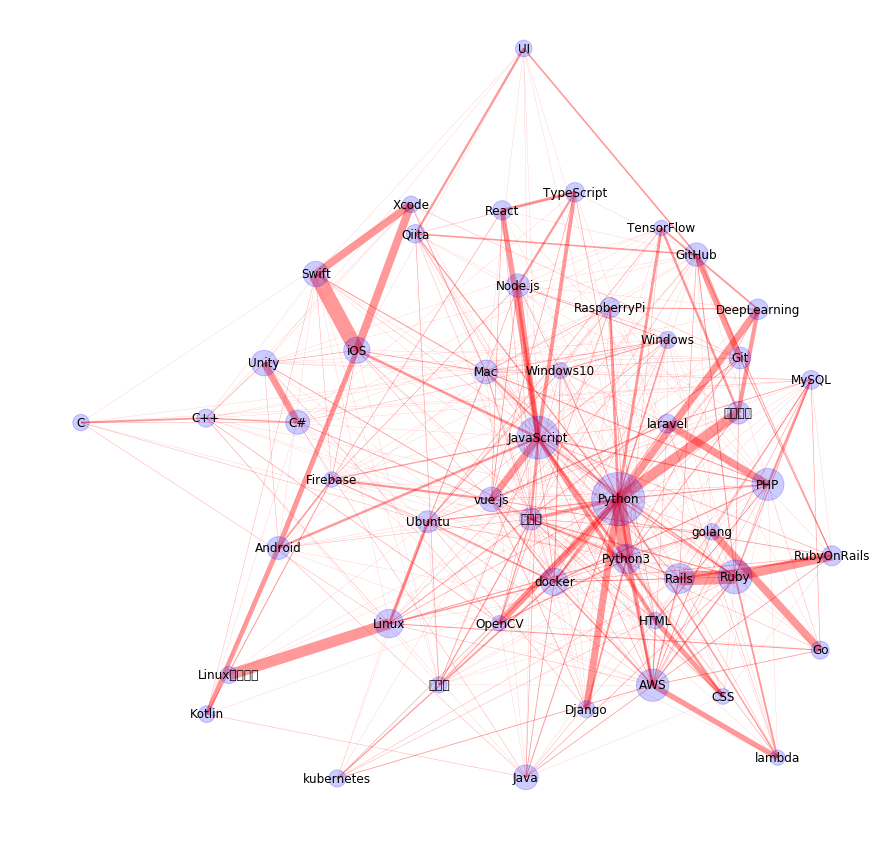

In [64]:
plt.figure(figsize=(15,15)) # グラフのサイズを定義
pos = nx.spring_layout(G, k=1.5) # ノード間の反発力を定義。値が小さいほど密集する

node_size = [ d['count']*5 for (n,d) in G.nodes(data=True)] # ノードの大きさを調整
nx.draw_networkx_nodes(G, pos, node_color='b', alpha=0.2, node_size=node_size, font_weight="bold", font_family='VL Gothic') # ノードのスタイルを定義
nx.draw_networkx_labels(G, pos, fontsize=14,font_family='/usr/share/fonts/ipa-pgothic/ipagp.ttf')

edge_width = [d['weight']*0.2 for (u,v,d) in G.edges(data=True)] # エッジの太さを調整
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='r', width=edge_width) #エッジのスタイルを定義
plt.axis('off')

In [53]:
pr = nx.pagerank(G)

(-0.8709339711110516,
 1.08160113979431,
 -1.0635103562360568,
 1.1103591722413542)

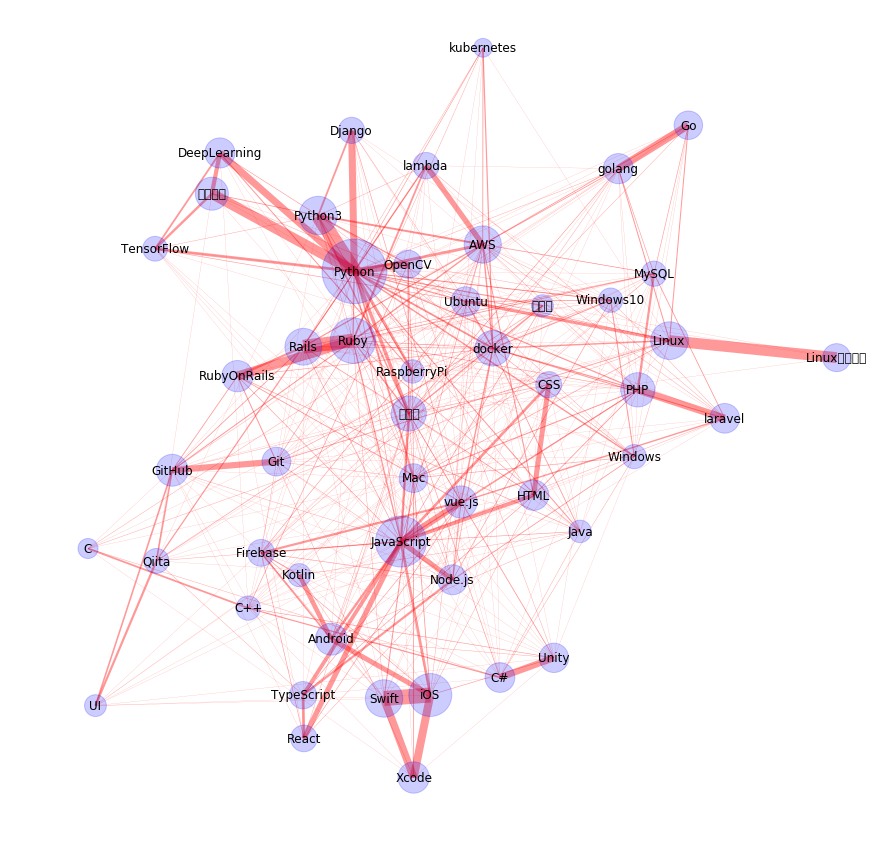

In [55]:
plt.figure(figsize=(15,15)) # グラフのサイズを定義
pos = nx.spring_layout(G, k=1.5) # ノード間の反発力を定義。値が小さいほど密集する

#node_size = [ d['count']*5 for (n,d) in G.nodes(data=True)] # ノードの大きさを調整
nx.draw_networkx_nodes(G, pos, node_color='b', alpha=0.2, node_size=[50000*v for v in pr.values()], font_weight="bold", font_family='VL Gothic') # ノードのスタイルを定義
nx.draw_networkx_labels(G, pos, fontsize=14,font_family='Osaka')

edge_width = [d['weight']*0.2 for (u,v,d) in G.edges(data=True)] # エッジの太さを調整
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='r', width=edge_width) #エッジのスタイルを定義

plt.axis('off')

In [56]:
import matplotlib.font_manager as fm
fm.findSystemFonts()

['/usr/share/fonts/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerif-BoldItalic.ttf',
 '/usr/share/fonts/tibetan-machine-uni/TibMachUni-1.901b.ttf',
 '/usr/share/fonts/lohit-tamil/Lohit-Tamil.ttf',
 '/usr/share/fonts/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansCondensed.ttf',
 '/usr/share/fonts/lohit-assamese/Lohit-Assamese.ttf',
 '/usr/share/fonts/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerif-Italic.ttf',
 '/usr/share/fonts/khmeros/KhmerOS_content.ttf',
 '/usr/share/fonts/khmeros/KhmerOS_sys.ttf',
 '/usr/share/fonts/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansMono-Oblique.ttf',
 '/usr/share/fonts/thai-scalable/Waree.ttf',
 '/usr/share/fonts/lklug/lklug.ttf',
 '/usr/share/fonts/abyssinica/Abyssinica_SIL.ttf',
 '/usr/share/fonts/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/lohit-oriya/Lohit-Oriya.ttf',
 '

In [57]:
from matplotlib.font_manager import FontProperties

In [65]:
fp = FontProperties(fname='/usr/share/fonts/ipa-pgothic/ipagp.ttf', size=50)

In [1]:
import networkx as nx
import numpy as np
import requests
import json
import collections
import itertools
%matplotlib inline
import matplotlib.pyplot as plt

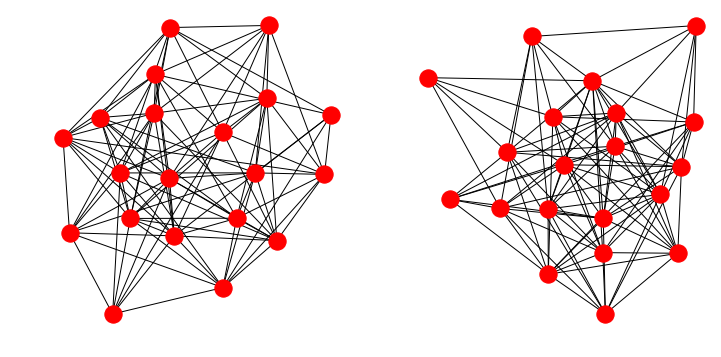

20
100


In [54]:
N = 20
S = 100
# グラフの構築
G = nx.gnm_random_graph(N,S)
H = nx.gnm_random_graph(N,S)

# レイアウトの取得
pos_G = nx.spring_layout(G)
pos_H = nx.spring_layout(H)

# 可視化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
nx.draw_networkx_edges(G, pos_G)
nx.draw_networkx_nodes(G, pos_G)
plt.axis('off')

plt.subplot(1, 2, 2)
nx.draw_networkx_edges(H, pos_H)
nx.draw_networkx_nodes(H, pos_H)
plt.axis('off')
plt.show()

print(nx.number_of_nodes(G))
print(nx.number_of_edges(G))

In [55]:
A = nx.to_numpy_matrix(G)
B = nx.to_numpy_matrix(H)

In [56]:
A

matrix([[0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
         0., 1., 1., 1.],
        [0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
         0., 0., 0., 1.],
        [1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         0., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
         1., 0., 1., 1.],
        [0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
         1., 1., 1., 0.],
        [1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
         1., 1., 0., 1.],
        [0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
         0., 0., 0., 1.],
        [0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         1., 1., 0., 0.],
        [1

In [57]:
B

matrix([[0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
         0., 1., 1., 0.],
        [0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
         0., 1., 0., 1.],
        [1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 0., 0., 0.],
        [1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 0., 1., 0.],
        [1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
         1., 1., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
         0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
         1., 0., 1., 1.],
        [1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
         0., 1., 1., 0.],
        [0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
         0., 0., 1., 1.],
        [1

In [58]:
aaa = np.abs(A - B)
aaa

matrix([[0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
         0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
         0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
         0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 1., 1.],
        [1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
         0., 1., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
         0., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
         0., 1., 0., 1.],
        [0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
         0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
         0., 1., 1., 0.],
        [0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
         1., 1., 1., 1.],
        [0

In [60]:
np.sum(aaa)/2

74.0

# ここからみてください！

In [1]:
import os
import h5py
import networkx as nx
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def matching_distance(matrix_1, matrix_2):
    print('No.1 adjacency matrix shape is', matrix_1.shape)
    print('Np.2 adjacency matrix shape is', matrix_2.shape)
    return np.sum(np.abs(matrix_1 - matrix_2))/2

In [3]:
os.chdir("/home/sato/dtw/")
!ls

0101.hdf  0105.hdf  0109.hdf  0113.hdf	0117.hdf  0121.hdf  0125.hdf
0102.hdf  0106.hdf  0110.hdf  0114.hdf	0118.hdf  0122.hdf  0126.hdf
0103.hdf  0107.hdf  0111.hdf  0115.hdf	0119.hdf  0123.hdf  0127.hdf
0104.hdf  0108.hdf  0112.hdf  0116.hdf	0120.hdf  0124.hdf


In [4]:
matrix_list = []
for i in range(1,28):
    h5file = h5py.File("01" + "{0:02d}".format(i) + ".hdf","r")
    matrix = h5file[list(h5file.keys())[0]].value
    matrix_list.append(matrix)
print("There are", len(matrix_list), "people.")

There are 27 people.


In [5]:
distance_list = []
for i in matrix_list:
    for j in matrix_list:
        distance_list.append(matching_distance(i,j))

No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (36

No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (36

No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (36

No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (36

No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (36

No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)
No.1 adjacency matrix shape is (360, 360)
Np.2 adjacency matrix shape is (360, 360)


In [6]:
distance_matrix = np.reshape(np.array(distance_list), (27,27))

In [7]:
distance_matrix

array([[      0.        , 1002143.48647225, 1503129.04720296,
        1102338.44927326,  890147.06749071,  795703.64018462,
        1431668.28605618, 1117201.76581278, 1080898.40562717,
        1524909.53271459, 1145710.91868943, 1096721.47062585,
        1614346.81908022, 1277620.04859631, 1528272.31555943,
        1119140.72712238,  853218.31817739, 1350799.38839659,
        1517664.741252  , 1223111.84853496,  815831.1132095 ,
        1166873.95159467, 1123499.51106536, 1276719.56864151,
        1283944.00039087,  946644.94012988, 1322905.79338679],
       [1002143.48647225,       0.        , 1616758.06697965,
        1196286.80608183,  866251.81640093,  929358.27171256,
        1404710.87898017, 1167363.96494141, 1207672.37845459,
        1563175.15606035, 1250106.1044439 , 1214235.91576098,
        1543231.16832941, 1423800.24129309, 1499374.68405961,
        1135951.88606531,  885680.61925948, 1384148.18887849,
        1631254.93819495, 1335037.33303333,  838954.42559858,
       

In [8]:
np.sort(np.array(distance_list))

array([      0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
        725703.97740433,  725703.97740433,  730234.09745646,
        730234.09745646,  743132.61157666,  743132.61157666,
        771320.31799663,  771320.31799663,  781068.56323727,
        781068.56323727,  784910.44882288,  784910.44882288,
        795703.64018462,  795703.64018462,  815831.1132095 ,
        815831.1132095 ,  817646.19062308,  817646.19062308,
        823115.59945859,  823115.59945859,  838954.42559858,
        838954.42559858,

In [9]:
heatmap_distance_list = [0 if i == 0 else i - 725703.97740433 for i in distance_list]
heatmap_distance_matrix = np.reshape(np.array(heatmap_distance_list), (27,27))

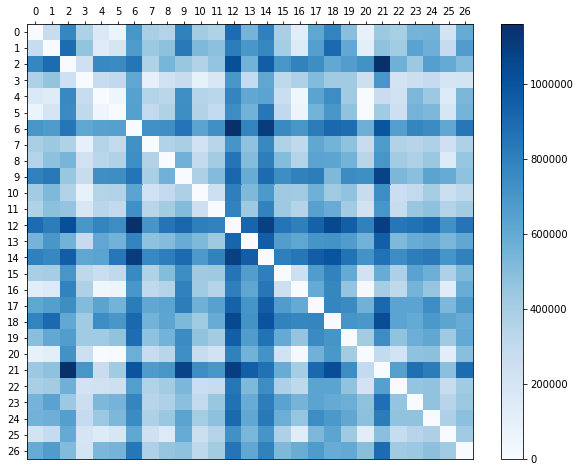

In [10]:
person_label = [i for i in range(0,27)]
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = ax.pcolor(heatmap_distance_matrix, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(heatmap_distance_matrix.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(heatmap_distance_matrix.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(person_label, minor=False)
ax.set_yticklabels(person_label, minor=False)
fig.colorbar(heatmap, ax=ax)
plt.show()

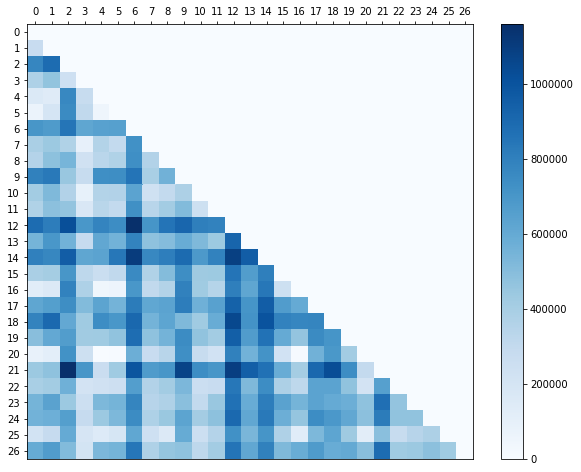

In [11]:
person_label = [i for i in range(0,27)]
fig, ax = plt.subplots(figsize=(10, 8))
heatmap = ax.pcolor(np.triu(heatmap_distance_matrix.T).T, cmap=plt.cm.Blues)
ax.set_xticks(np.arange(heatmap_distance_matrix.shape[0]) + 0.5, minor=False)
ax.set_yticks(np.arange(heatmap_distance_matrix.shape[1]) + 0.5, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.set_xticklabels(person_label, minor=False)
ax.set_yticklabels(person_label, minor=False)
fig.colorbar(heatmap, ax=ax)
plt.show()

/home/sato/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/home/sato/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Yu Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


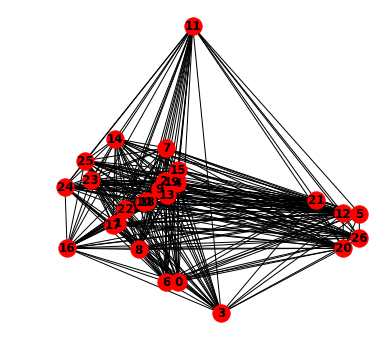

In [12]:
#距離をそのまま重みとしたネットワーク
G = nx.from_numpy_matrix(distance_matrix)
pos = nx.spring_layout(G)
plt.figure(figsize=(6, 6))
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos, fontsize=14, font_weight="bold")
plt.axis('off')
plt.show()

In [13]:
new_distance_list = [0 if i >= 2000000 else i for i in distance_list]
renew_distance_list = [i if i == 0.0 else 10000000000/i for i in new_distance_list]
new_distance_matrix = np.reshape(np.array(renew_distance_list), (27,27))

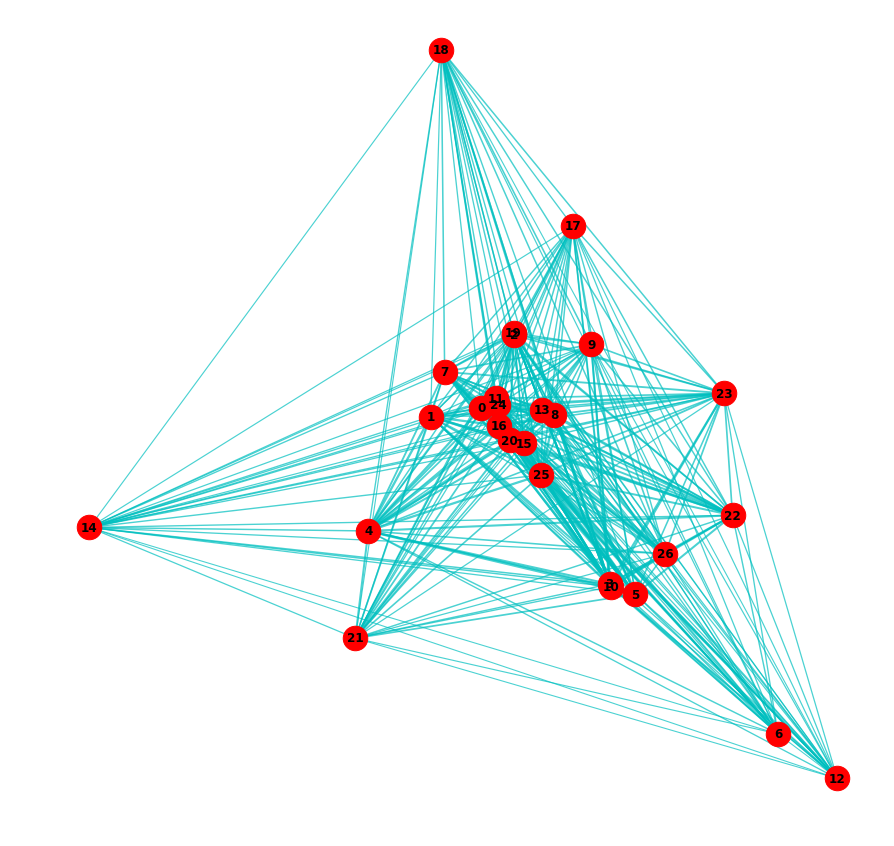

In [98]:
#距離の逆数を重みとしたネットワーク
new_G = nx.from_numpy_matrix(new_distance_matrix)
new_pos = nx.spring_layout(new_G)
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(new_G, new_pos, node_size=600)
nx.draw_networkx_labels(new_G, new_pos, fontsize=14, font_weight="bold")
edge_width = [ d['weight']*0.0002 for (u,v,d) in new_G.edges(data=True)]
nx.draw_networkx_edges(new_G, new_pos, alpha=0.7, edge_color='C', width=edge_width)
plt.axis('off')
plt.show()

# コンテンツ間のネットワーク(27人分)

In [17]:
#上からnノード分抽出
n_node = 20
n_node_matrix_list = []
for i in matrix_list:
    n_node_matrix_list.append(i[0:n_node, 0:n_node])

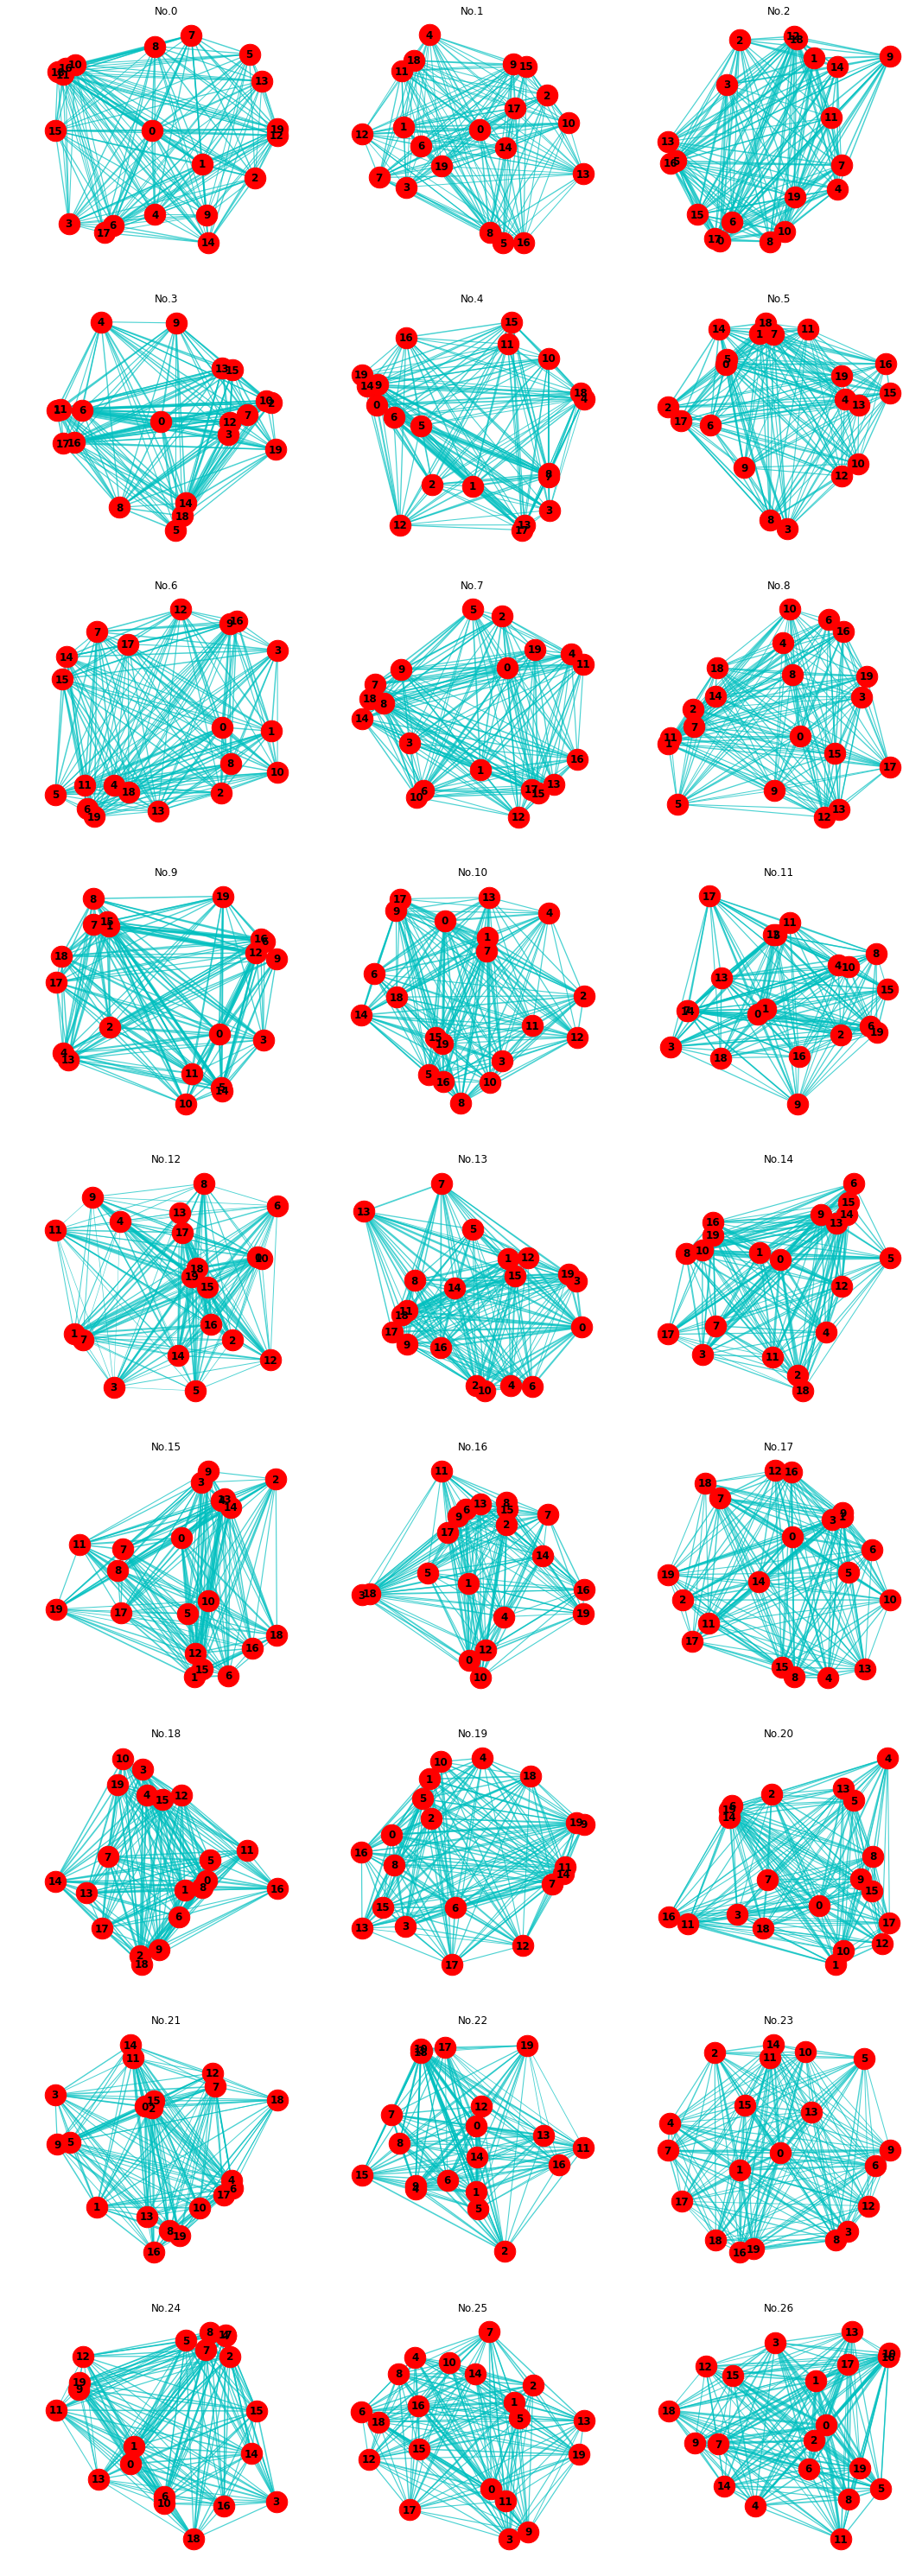

In [31]:
plt.figure(figsize=(18, 54))
for i in range(len(n_node_matrix_list)):
    content_G = nx.from_numpy_matrix(n_node_matrix_list[i])
    content_pos = nx.spring_layout(content_G, k = 0.07)
    plt.subplot(9, 3, i+1)
    nx.draw_networkx_nodes(content_G, content_pos, node_size=600)
    nx.draw_networkx_labels(content_G, content_pos, fontsize=14, font_weight="bold")
    edge_width = [ d['weight']*0.01 for (u,v,d) in content_G.edges(data=True)]
    nx.draw_networkx_edges(content_G, content_pos, alpha=0.7, edge_color='C', width=edge_width)
    plt.axis('off')
    plt.title("No." + str(i))
plt.show()